In [1]:
from fda import os, zipfile, FDA, DOWNLOAD_URL, COLUMNS_REQ
from analyse_fda import ANALYSE_FDA

FDA class is a utility class that downlaods the data from 'https://api.fda.gov/download.json'
It downloads the entire data of drug/label and combines the jsons and preprocesses to a flat pandas dataframe and saves it for easy access
and for offline access. Further access to entire data is required for Part B.
When data needs to be updated the class needs to be simply run.

In [2]:
# fda = FDA(DOWNLOAD_URL)
# fda.get_drug_label_files()
# fda.download_save_zip_files(fda.file_urls)
# fda.unzip_files(fda.zip_files)
# fda.merge_jsons_to_pandas_df(fda.json_files, COLUMNS_REQ)
# fda.eval_unpack_df_cols(fda.pandas_df)
# fda.save_pandas_df(fda.pandas_df)

In [3]:
PANDAS_PATH = './fda_data/drug_label/pandas/'
FDA_CSV_FILE = PANDAS_PATH + 'pandas_df.csv'
FDA_ZIP_FILE = PANDAS_PATH + 'pandas_df.csv.zip'

In [4]:
if not os.path.exists(FDA_CSV_FILE):
    with zipfile.ZipFile(FDA_ZIP_FILE, 'r') as zip_obj:
                    zip_obj.extractall(PANDAS_PATH)

ANALYSE_FDA has a built in method to read the pandas created & saved file by FDA class and tranforms the data and 
provides the required results.
Note: ANALYSE_FDA.get_ingredients() does basic pre-processing to get ingremdients however this is very rudimentary and requires a better method and understanding of the data.

In [5]:
analyse_fda =  ANALYSE_FDA(FDA_CSV_FILE)

In [6]:
analyse_fda.dataframe = analyse_fda.add_year_ingredients(analyse_fda.dataframe)

### PART A Results

In [7]:
company_name = 'AstraZeneca'
az_df = analyse_fda.get_company_df(company_name)
az_results_df = analyse_fda.get_avg_yearly_results(az_df)
az_results_df

,avg_number_of_ingredients,drug_names,year
0,25.000000,"seroquel,seroquel xr,nexium,brilinta,lokelma,b...",2018
1,21.000000,"quetiapine fumarate extended release,fasenra,s...",2017
2,20.818182,"lumoxiti,bydureon,farxiga,bydureon bcise,tudor...",2019
3,19.727273,"pulmicort respules,atacand hct,pulmicort flexh...",2016
4,37.000000,arimidex,2014


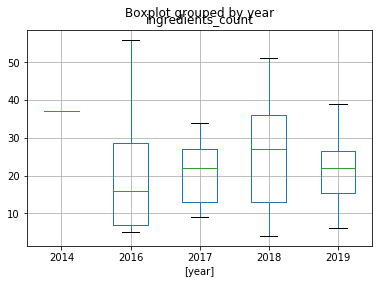

In [11]:
az_plot = az_df.boxplot(column=['ingredients_count'], by=['year'])
az_plot

### PART B Results

In [9]:
res = analyse_fda.dataframe.drop(['effective_time'], axis=1).groupby(['year','openfda_route']).mean()
res

,,ingredients_count
year,openfda_route,
1960,ORAL,14.000000
1971,ORAL,21.000000
1973,ORAL,19.000000
1974,ORAL,26.000000
1977,ORAL,29.000000
1978,ORAL,31.000000
1983,ORAL,19.500000
1986,ORAL,20.000000
1987,ORAL,18.000000


In [10]:
# analyse_fda.dataframe.boxplot(column=['ingredients_count'], by=['year', 'openfda_route'])